# 🧪 Machine Learning Corrections for BHs and REs.

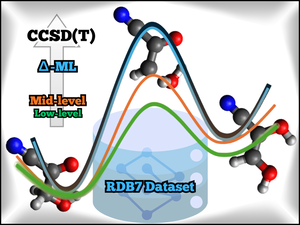

This notebook allows you to compute **Barrier Height (BH) corrections** and **Reaction Enthalpy (RE) corrections** using **MACE Machine Learning (ML) models**.

You can download the pre-trained models from our GitHub repository:

[ML_corrections_BH_RE Models Repository](https://github.com/OmarRodriguezLopez1398/ML_corrections_BH_RE.git)

You will be able to:
- Upload reactants, transition states, and product XYZ files.  
- Evaluate energies with a pre-trained MACE model.  
- Compute BH or RE corrections in kcal/mol.  
- Visualize molecular structures in 3D.


# ⚙️ Install Dependencies

First, we will install all the third-party packages:

- `nglview` and `ASE` for 3D molecular visualization.
- `mace-torch` to run MACE evaluations.
- Enable Colab widget manager for interactive displays.

> **Note:** Installing these dependencies may take a few minutes due to package downloads and environment setup.

In [1]:
# @title
%%capture
!pip install nglview ase
!pip install mace-torch

import os
import re
import nglview as nv
from ase.io import read
import matplotlib.pyplot as plt
from google.colab import files
from mace.cli.eval_configs import main as mace_eval_configs_main
import sys
from IPython.display import display




In [2]:
# @title
from google.colab import output
output.enable_custom_widget_manager()

# 🛠 Functions Overview

Here we define all utility functions used in the notebook:

- **File upload**: Upload XYZ files and ML model.
- **ML evaluation**: Evaluate structures with the MACE ML model.
- **Energy extraction**: Parse MACE output to get energies.
- **Visualization**: View molecular structures in 3D using `nglview`.
- **Energy conversion**: Convert energies from eV to kcal/mol.

In [3]:
# @title


# ============================================================
#  FILE UPLOAD UTILITIES
# ============================================================

def upload_files():
    """
    Upload one or more files in Colab and return list of filenames.
    """
    uploaded = files.upload()
    return list(uploaded.keys())

# ============================================================
#  MACE EVALUATION
# ============================================================

def eval_mace(configs, model, output):
    sys.argv = ["program", "--configs", configs, "--model", model, "--output", output]
    mace_eval_configs_main()

# ============================================================
#  ENERGY EXTRACTION
# ============================================================

def extract_mace_energy(output_file):
    pattern = r"MACE_energy=([-\d\.]+)"
    with open(output_file, "r") as f:
        text = f.read()
    values = re.findall(pattern, text)
    return float(values[-1]) if values else None

# ============================================================
#  Visualization
# ============================================================

def visualize_xyz(filepath):
    atoms = read(filepath)
    view = nv.show_ase(atoms)
    view.add_ball_and_stick()
    return view

# ============================================================
# ENERGY CONVERSION
# ============================================================

EV_TO_KCAL = 23.0605
def ev_to_kcalmol(E):
    return E * EV_TO_KCAL


# 🔹 Select Type of Correction

At this step, you will choose which type of correction to perform:

1. **Barrier Height (BH) Correction** – requires Transition State (TS) + reactants.
2. **Reaction Enthalpy (RE) Correction** – requires reactants + products.

This choice determines which files you will upload next.


In [4]:
# @title
# ============================================================
#  USER SELECTION: Type of Calculation
# ============================================================

print("What would you like to calculate?")
print("1 = Barrier Height (BH) Correction")
print("2 = Reaction Enthalpy (RE) Correction")

choice = input("Enter 1 or 2: ").strip()

# Validate input
while choice not in ["1", "2"]:
    choice = input("⚠ Invalid input. Please enter 1 or 2: ").strip()

# Confirmation message
if choice == "1":
    print("\nYou selected: Barrier Height (BH) Correction")
elif choice == "2":
    print("\nYou selected: Reaction Enthalpy (RE) Correction")


What would you like to calculate?
1 = Barrier Height (BH) Correction
2 = Reaction Enthalpy (RE) Correction
Enter 1 or 2: 1

You selected: Barrier Height (BH) Correction


# 📁 Upload Molecular Structures

Depending on your choice:

- **BH Correction**: Upload the TS XYZ file and one or more reactants.
- **RE Correction**: Upload one or more reactants and products.

After uploading, it will **display each structure interactively** in 3D using `nglview`.


In [5]:
# @title
# ============================================================
#  LOADING FILES FOR BH OR RE CORRECTIONS
# ============================================================
from google.colab import output
output.enable_custom_widget_manager()

if choice == "1":
    # -----------------------------
    # Barrier Height (BH) Corrections
    # TS + Reactants
    # -----------------------------

    print("\nUpload the Transition State (TS) XYZ file:")
    uploaded = files.upload()
    ts_file = list(uploaded.keys())[0]
    print("TS loaded:", ts_file)
    display(visualize_xyz(ts_file))

    print("\nUpload one or more Reactant XYZ files:")
    uploaded = files.upload()
    reactant_files = list(uploaded.keys())
    print("Reactants loaded:", reactant_files)
    for f in reactant_files:
        display(visualize_xyz(f))

elif choice == "2":
    # -----------------------------
    # Reaction Enthalpy (RE) Corrections
    # Reactants + Products
    # -----------------------------

    print("\nUpload one or more Reactant XYZ files:")
    uploaded = files.upload()
    reactant_files = list(uploaded.keys())
    print("Reactants loaded:", reactant_files)
    for f in reactant_files:
        display(visualize_xyz(f))

    print("\nUpload one or more Product XYZ files:")
    uploaded = files.upload()
    product_files = list(uploaded.keys())
    print("Products loaded:", product_files)
    for f in product_files:
        display(visualize_xyz(f))



Upload the Transition State (TS) XYZ file:


Saving ts000075.xyz to ts000075.xyz
TS loaded: ts000075.xyz


NGLWidget()


Upload one or more Reactant XYZ files:


Saving r000075.xyz to r000075.xyz
Reactants loaded: ['r000075.xyz']


NGLWidget()

# 🤖 Upload ML Model

Upload the pre-trained MACE ML model file (`.pt`, `.pth`, or `.model`).

You can download the models from our GitHub repository:

[ML_corrections_BH_RE Models Repository](https://github.com/OmarRodriguezLopez1398/ML_corrections_BH_RE.git)

The repository contains a folder named `Models` with the following structure:

```text
Models
├── PM6
│   ├── PM6_CC_delta.model
│   └── PM6_DFT_delta.model
├── HF
│   ├── HF_CC_delta.model
│   └── HF_DFT_delta.model
└── r²SCAN-3c
    ├── r²SCAN-3c_CC_delta.model
    └── r²SCAN-3c_DFT_delta.model
```

Select the model that corresponds to your desired **level of theory**.

Once uploaded, it will **evaluate all uploaded structures** with this model, generating `_MACE.out` files for each structure.



In [6]:
# @title
# ============================================================
#  UPLOAD AND EVALUATE MACE MODEL
# ============================================================


# Upload MACE model
print("\nUpload your MACE model file (.pt, .pth, .model):")
uploaded = files.upload()
model_file = list(uploaded.keys())[0]
print("Model selected:", model_file)

# Collect all structures to evaluate
structures_to_evaluate = set()

if choice == "1":
    structures_to_evaluate.add(ts_file)

structures_to_evaluate.update(reactant_files)

if choice == "2":
    structures_to_evaluate.update(product_files)

# Evaluate each structure with MACE
for xyz in structures_to_evaluate:
    output = os.path.splitext(xyz)[0] + "_MACE.out"
    print(f"Evaluating {xyz} → {output}")
    eval_mace(xyz, model_file, output)

print("\n✔ All MACE evaluations completed.")



Upload your MACE model file (.pt, .pth, .model):


Saving HF_CC_delta.model to HF_CC_delta.model
Model selected: HF_CC_delta.model
Evaluating r000075.xyz → r000075_MACE.out


/usr/local/lib/python3.12/dist-packages/mace/cli/eval_configs.py:140: UserWarning: Environment variable TORCH_FORCE_NO_WEIGHTS_ONLY_LOAD detected, since the`weights_only` argument was not explicitly passed to `torch.load`, forcing weights_only=False.
  model = torch.load(f=args.model, map_location=args.device)
/usr/local/lib/python3.12/dist-packages/torch/serialization.py:1493: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  warnings.warn(


Evaluating ts000075.xyz → ts000075_MACE.out

✔ All MACE evaluations completed.


# 📊 Energy Extraction and Calculation

At this step:

- Read the MACE output files.
- Compute **Barrier Height (BH) correction** or **Reaction Enthalpy (RE) correction**.
- Convert the results to **kcal/mol**.


In [7]:
# @title
# ============================================================
# ENERGY EXTRACTION + FINAL RESULT
# ============================================================

reactant_energies = []
for rfile in reactant_files:
    r_out = os.path.splitext(rfile)[0] + "_MACE.out"
    reactant_energies.append(extract_mace_energy(r_out))

sum_reactants = sum(reactant_energies)

# -------------------------------------------------------------
# Barrier Height
# -------------------------------------------------------------
if choice == "1":
    ts_out = os.path.splitext(ts_file)[0] + "_MACE.out"
    E_TS = extract_mace_energy(ts_out)

    barrier = E_TS - sum_reactants
    barrier_kcal = ev_to_kcalmol(barrier)

    print("\n=======================================================")
    print("        BARRIER HEIGHT CORRECTION (kcal/mol)")
    print("=========================================================\n")
    print(f"BH correction = {barrier_kcal:.2f} kcal/mol")

# -------------------------------------------------------------
# Reaction enthalpy
# -------------------------------------------------------------
elif choice == "2":
    product_energies = []
    for pfile in product_files:
        p_out = os.path.splitext(pfile)[0] + "_MACE.out"
        product_energies.append(extract_mace_energy(p_out))

    sum_products = sum(product_energies)
    enthalpy = sum_products - sum_reactants
    enthalpy_kcal = ev_to_kcalmol(enthalpy)

    print("\n=====================================================")
    print("        REACTION ENTHALPY CORRECTION (kcal/mol)")
    print("=======================================================\n")
    print(f"RE correction = {enthalpy_kcal:.2f} kcal/mol")



        BARRIER HEIGHT CORRECTION (kcal/mol)

BH correction = -18.12 kcal/mol
